In [1]:
spark

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql import functions as F
from pyspark.sql.functions import round, col, min, max, sum, avg, count
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

In [2]:
#initialize Spark session
spark = SparkSession.builder.appName("EDA").getOrCreate()

#Load data from Google Cloud Storage
gcs_path = "gs://my-bigdata-project-lh/landing/itineraries.csv"
df = spark.read.csv(gcs_path, header=True, inferSchema=True)

#Show first 5 rows
df.limit(5).toPandas()

24/10/26 03:15:26 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/10/26 03:16:52 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [3]:
#Count the number of records(rows)
num_records = df.count()
print(f"Number of observations:{num_records}")

Number of observations:82138753


In [4]:
#List the columns 
columns = df.columns

#Schema Display: Readable
df.printSchema()
print(f"List of variables:{columns}")

root
 |-- legId: string (nullable = true)
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: boolean (nullable = true)
 |-- isRefundable: boolean (nullable = true)
 |-- isNonStop: boolean (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: s

In [5]:
#Set Pandas options to always display floats with a decimal point
pd.set_option('display.float_format','{:.2f}'.format)
pd.set_option('display.width', 1000)

#Show the data types that were parsed automatically
print("Output for rdf.info()")
print(df.dtypes)

#Check some sample data
print("Output for df.head()")
print(tabulate(df[['searchDate', 'flightDate','totalFare']].head(15), headers=['searchDate', 'flightDate', 'totalFare'], tablefmt='psql'))

Output for rdf.info()
[('legId', 'string'), ('searchDate', 'date'), ('flightDate', 'date'), ('startingAirport', 'string'), ('destinationAirport', 'string'), ('fareBasisCode', 'string'), ('travelDuration', 'string'), ('elapsedDays', 'int'), ('isBasicEconomy', 'boolean'), ('isRefundable', 'boolean'), ('isNonStop', 'boolean'), ('baseFare', 'double'), ('totalFare', 'double'), ('seatsRemaining', 'int'), ('totalTravelDistance', 'int'), ('segmentsDepartureTimeEpochSeconds', 'string'), ('segmentsDepartureTimeRaw', 'string'), ('segmentsArrivalTimeEpochSeconds', 'string'), ('segmentsArrivalTimeRaw', 'string'), ('segmentsArrivalAirportCode', 'string'), ('segmentsDepartureAirportCode', 'string'), ('segmentsAirlineName', 'string'), ('segmentsAirlineCode', 'string'), ('segmentsEquipmentDescription', 'string'), ('segmentsDurationInSeconds', 'string'), ('segmentsDistance', 'string'), ('segmentsCabinCode', 'string')]
Output for df.head()
+--------------+--------------+-------------+
| searchDate   | fl

In [6]:
# Round the numeric values in the summary statistics to 2 decimal places for readability
numeric_summary = df[['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'baseFare', 'totalFare']].describe()

# Convert the summary DataFrame to make the numeric summary more readable
numeric_summary = numeric_summary.withColumn('elapsedDays', round(col('elapsedDays'), 2)) \
    .withColumn('seatsRemaining', round(col('seatsRemaining'), 2)) \
    .withColumn('totalTravelDistance', round(col('totalTravelDistance'), 2)) \
    .withColumn('baseFare', round(col('baseFare'), 2)) \
    .withColumn('totalFare', round(col('totalFare'), 2))

# Show the rounded and readable numeric summary
numeric_summary.show(truncate=False)

+-------+-----------+--------------+-------------------+-----------+-----------+
|summary|elapsedDays|seatsRemaining|totalTravelDistance|baseFare   |totalFare  |
+-------+-----------+--------------+-------------------+-----------+-----------+
|count  |8.2138753E7|8.2138753E7   |7.6044221E7        |8.2138753E7|8.2138753E7|
|mean   |0.15       |5.98          |1609.9             |292.66     |340.39     |
|stddev |0.36       |2.88          |857.33             |183.19     |196.03     |
|min    |0.0        |0.0           |89.0               |0.01       |19.59      |
|max    |2.0        |10.0          |7252.0             |7662.33    |8260.61    |
+-------+-----------+--------------+-------------------+-----------+-----------+



In [7]:
# Show min and max dates for date columns
date_summary = df.select(
    min("searchDate").alias("min_searchDate"),
    max("searchDate").alias("max_searchDate"),
    min("flightDate").alias("min_flightDate"),
    max("flightDate").alias("max_flightDate")
)

# Show the result
date_summary.show(truncate=False)

+--------------+--------------+--------------+--------------+
|min_searchDate|max_searchDate|min_flightDate|max_flightDate|
+--------------+--------------+--------------+--------------+
|2022-04-16    |2022-10-05    |2022-04-17    |2022-11-19    |
+--------------+--------------+--------------+--------------+



In [8]:
# Initialize Spark session
spark = SparkSession.builder.appName("SampleData").getOrCreate()

sample_fraction = 0.06  
df_sample = df.sample(fraction=sample_fraction, withReplacement=False, seed=42)

# Show the sampled DataFrame
df_sample.show(5)
df_sample_count = df_sample.count()

# Check sample size
print(f"Sample size: {df_sample_count} records")

#numeric_columns = [ 'elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'baseFare', 'totalFare']

24/10/26 03:18:58 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+--------------------+----------+----------+---------------+------------------+-------------+--------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+---------------------------------+------------------------+-------------------------------+----------------------+--------------------------+----------------------------+--------------------+-------------------+----------------------------+-------------------------+----------------+-----------------+
|               legId|searchDate|flightDate|startingAirport|destinationAirport|fareBasisCode|travelDuration|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|segmentsDepartureTimeEpochSeconds|segmentsDepartureTimeRaw|segmentsArrivalTimeEpochSeconds|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode| segmentsAirlineName|segmentsAirlineCode|segmentsEquipmentDescription|segmentsDurationInSeconds|segments

Sample size: 4929649 records


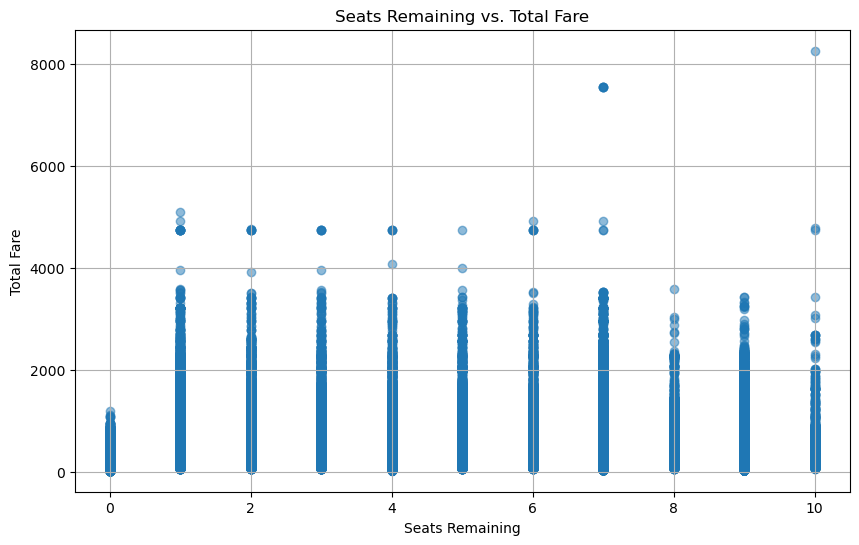

In [9]:
# Select necessary columns and convert to Pandas DataFrame
df_sample_seats_totalfare_pd = df_sample.select("seatsRemaining", "totalFare").toPandas()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sample_seats_totalfare_pd ["seatsRemaining"], df_sample_seats_totalfare_pd["totalFare"], alpha=0.5)
plt.title("Seats Remaining vs. Total Fare")
plt.xlabel("Seats Remaining")
plt.ylabel("Total Fare")
plt.grid(True)
plt.show()

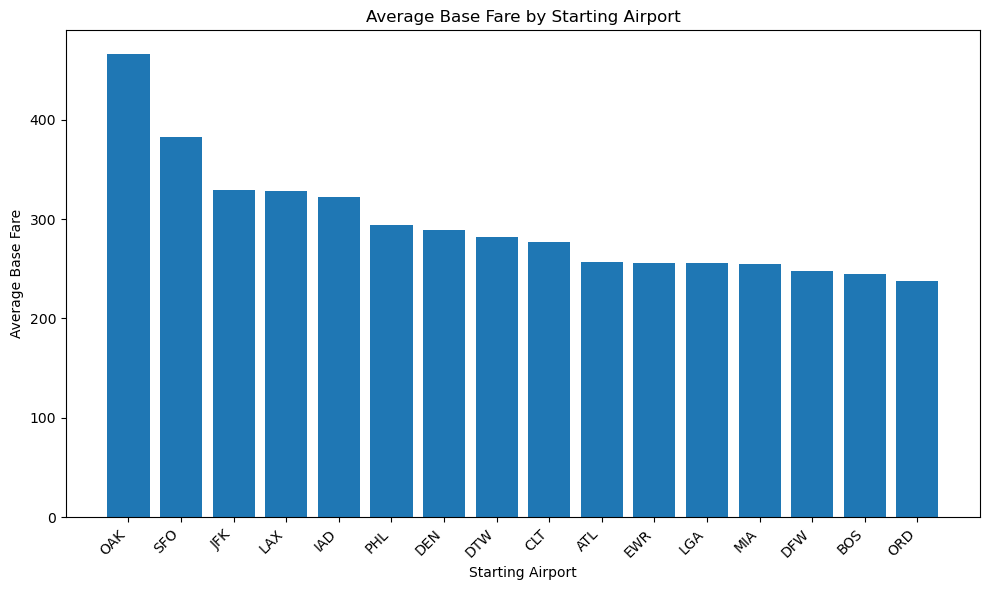

In [11]:
# Calculate the average baseFare by startingAirport
avg_base_fare_by_airport = (
    df_sample.groupBy("startingAirport")
    .agg(avg("baseFare").alias("averageBaseFare"))
    .orderBy("averageBaseFare", ascending=False)
)

# Convert to Pandas for plotting
avg_base_fare_pd = avg_base_fare_by_airport.toPandas()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_base_fare_pd["startingAirport"], avg_base_fare_pd["averageBaseFare"])
plt.xlabel("Starting Airport")
plt.ylabel("Average Base Fare")
plt.title("Average Base Fare by Starting Airport")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

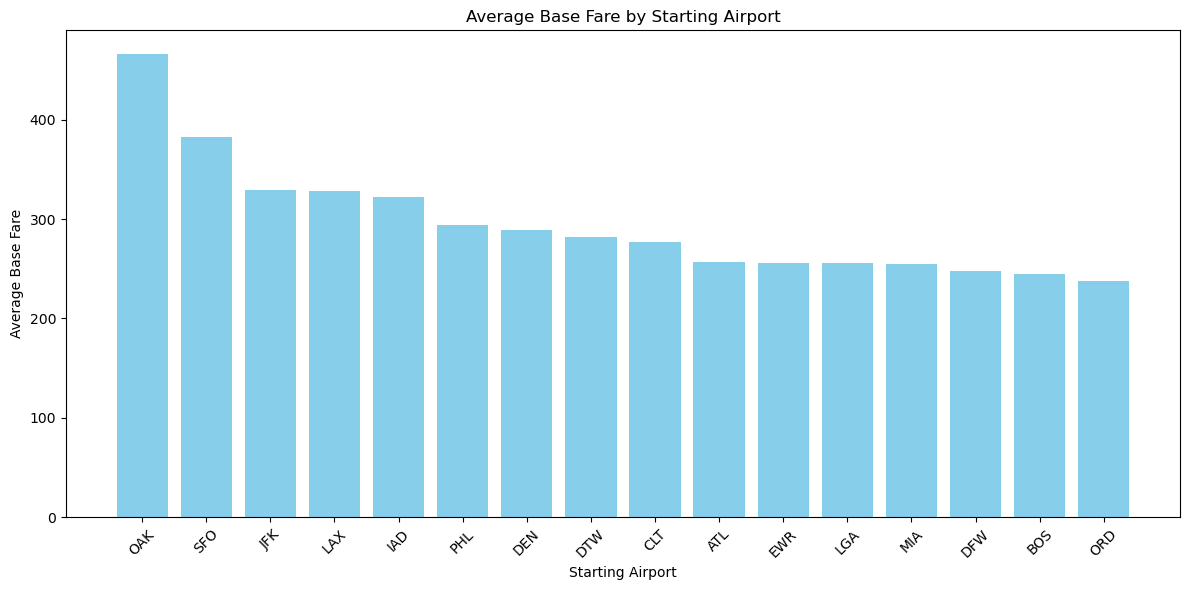

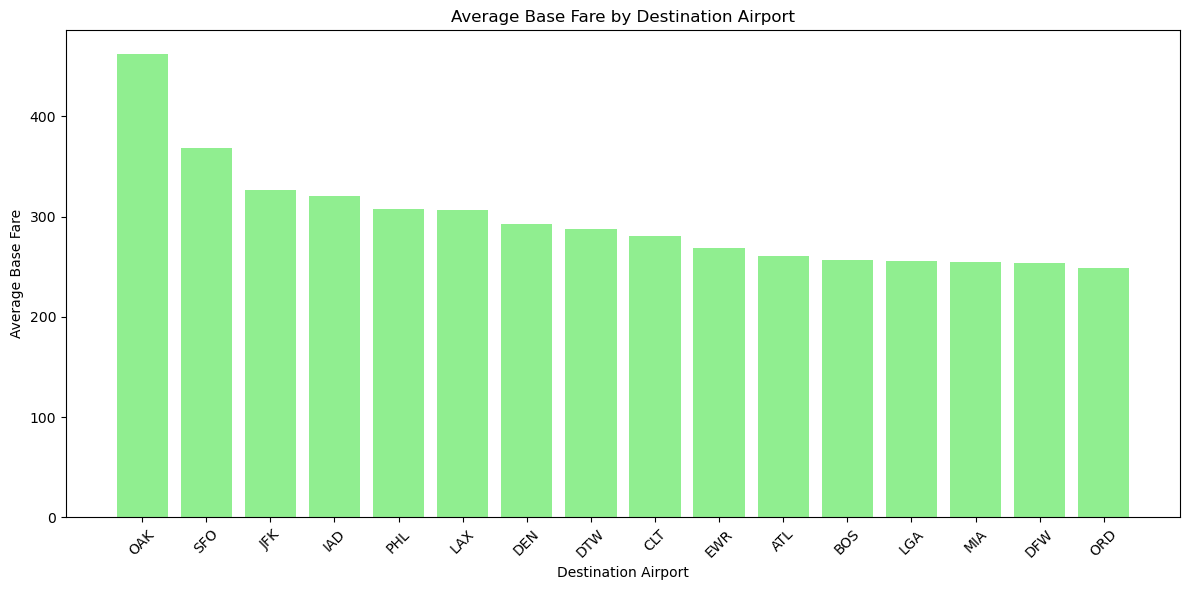

In [32]:
avg_baseFare_start = df_sample.groupBy("startingAirport") \
    .agg(F.avg("baseFare").alias("average_baseFare_start")) \
    .orderBy("average_baseFare_start", ascending=False) \
    .toPandas()

# Calculate average baseFare grouped by destinationAirport
avg_baseFare_dest = df_sample.groupBy("destinationAirport") \
    .agg(F.avg("baseFare").alias("average_baseFare_dest")) \
    .orderBy("average_baseFare_dest", ascending=False) \
    .toPandas()

# Plot for startingAirport
plt.figure(figsize=(12, 6))
plt.bar(avg_baseFare_start["startingAirport"], avg_baseFare_start["average_baseFare_start"], color="skyblue")
plt.xlabel("Starting Airport")
plt.ylabel("Average Base Fare")
plt.title("Average Base Fare by Starting Airport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for destinationAirport
plt.figure(figsize=(12, 6))
plt.bar(avg_baseFare_dest["destinationAirport"], avg_baseFare_dest["average_baseFare_dest"], color="lightgreen")
plt.xlabel("Destination Airport")
plt.ylabel("Average Base Fare")
plt.title("Average Base Fare by Destination Airport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

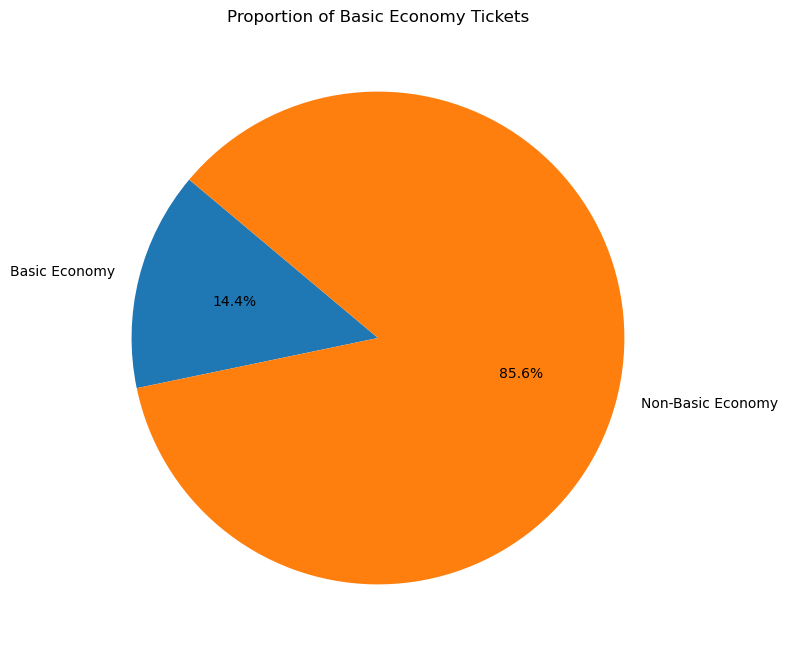

In [23]:
ticket_counts = df.groupBy("isBasicEconomy").count().collect()

# Extract counts for basic economy and non-basic economy tickets
basic_economy_count = next(row['count'] for row in ticket_counts if row['isBasicEconomy'] == True)
non_basic_economy_count = next(row['count'] for row in ticket_counts if row['isBasicEconomy'] == False)

# Prepare data for pie chart
labels = ['Basic Economy', 'Non-Basic Economy']
sizes = [basic_economy_count, non_basic_economy_count]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Basic Economy Tickets")
plt.show()

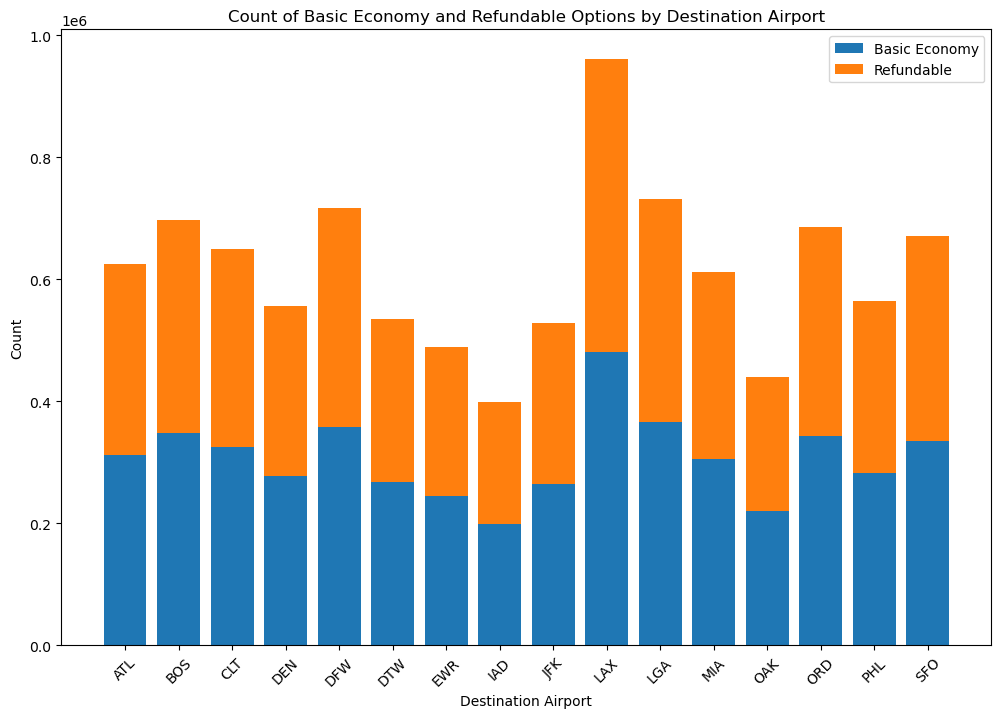

In [40]:
df_grouped = (
    df_sample.groupBy("destinationAirport")
    .agg(
        count("isBasicEconomy").alias("isBasicEconomy_count"),
        count("isRefundable").alias("isRefundable_count")
    )
    .orderBy("destinationAirport")
)

# Convert the aggregated Spark DataFrame to Pandas DataFrame for plotting
df_refund = df_grouped.toPandas()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_refund["destinationAirport"], df_refund["isBasicEconomy_count"], label="Basic Economy")
plt.bar(df_refund["destinationAirport"], df_refund["isRefundable_count"], bottom=df_refund["isBasicEconomy_count"], label="Refundable")
plt.title("Count of Basic Economy and Refundable Options by Destination Airport")
plt.xlabel("Destination Airport")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

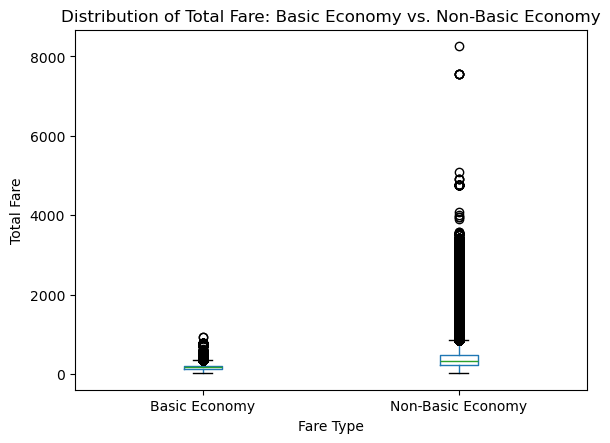

In [42]:
from pyspark.sql.functions import when
df_classified = df_sample.withColumn(
    "FareType",
    when(df_sample["isBasicEconomy"] == 1, "Basic Economy").otherwise("Non-Basic Economy")
)

# Select relevant columns and convert to Pandas for plotting
df_pandas = df_classified.select("FareType", "totalFare").toPandas()

# Plotting the box plot
plt.figure(figsize=(10, 6))
df_pandas.boxplot(column="totalFare", by="FareType", grid=False)
plt.title("Distribution of Total Fare: Basic Economy vs. Non-Basic Economy")
plt.suptitle("")  
plt.xlabel("Fare Type")
plt.ylabel("Total Fare")
plt.show()

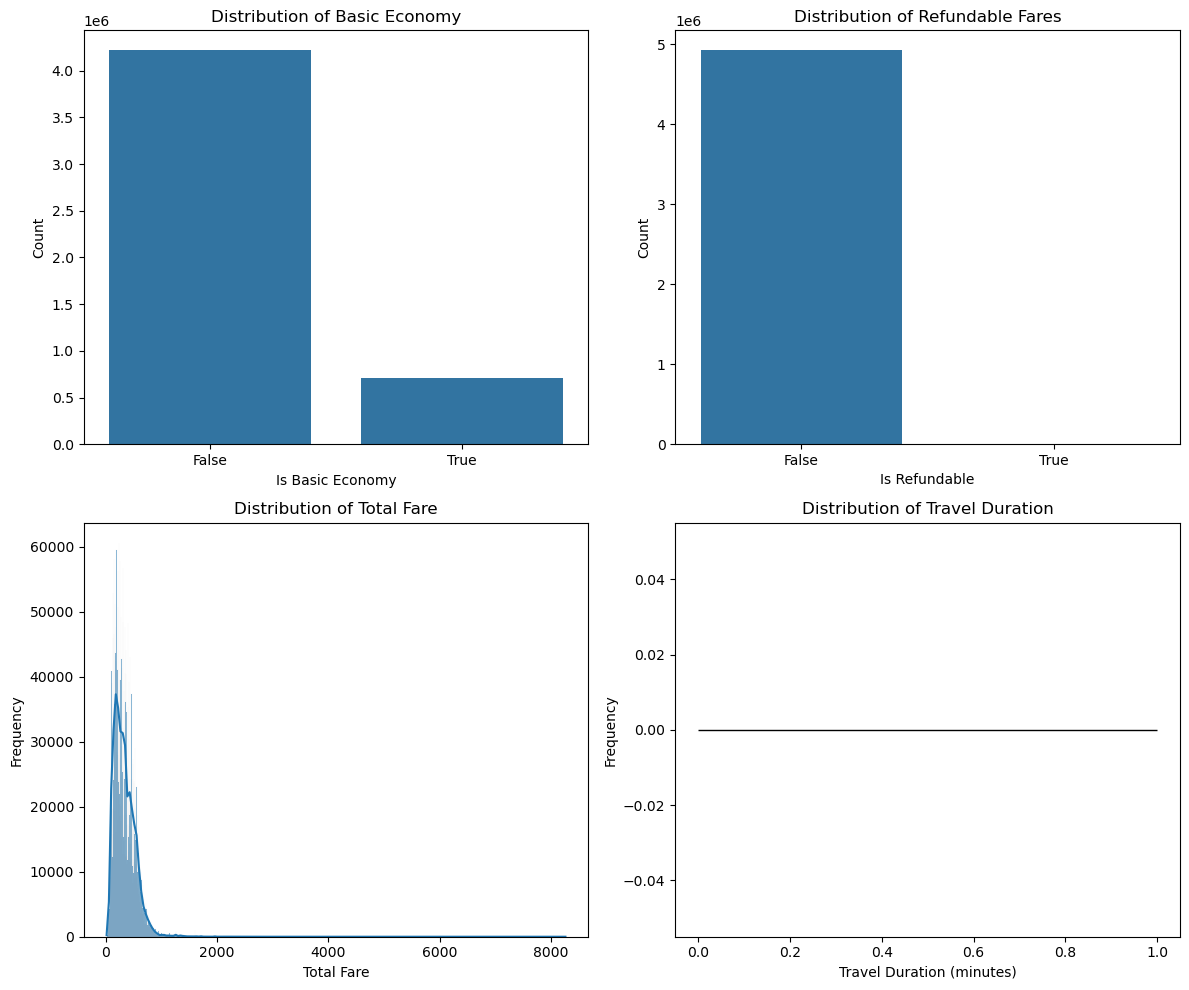

<Figure size 640x480 with 0 Axes>

In [56]:
df_numeric = df_sample.select(
    "isBasicEconomy",
    "isRefundable",
    "totalFare",
    "travelDuration"
).toPandas()

# Set up the plotting area
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

# Plot 1: Bar plot for isBasicEconomy
plt.subplot(2, 2, 1)
sns.countplot(x="isBasicEconomy", data=df_numeric)
plt.title("Distribution of Basic Economy")
plt.xlabel("Is Basic Economy")
plt.ylabel("Count")

# Plot 2: Bar plot for isRefundable
plt.subplot(2, 2, 2)
sns.countplot(x="isRefundable", data=df_numeric)
plt.title("Distribution of Refundable Fares")
plt.xlabel("Is Refundable")
plt.ylabel("Count")

# Plot 3: Histogram of totalFare
plt.subplot(2, 2, 3)
sns.histplot(df_numeric["totalFare"], kde=True)
plt.title("Distribution of Total Fare")
plt.xlabel("Total Fare")
plt.ylabel("Frequency")

# Plot 4: Histogram of travelDuration
plt.subplot(2, 2, 4)
sns.histplot(df_numeric["travelDuration"], kde=True)
plt.title("Distribution of Travel Duration")
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()
plt.subplots_adjust(hspace=0.5)

Text(0, 0.5, 'Count')

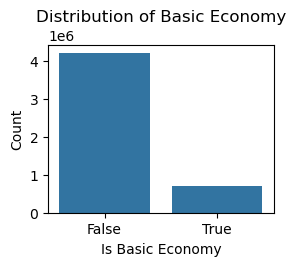

In [51]:
#Bar plot for isBasicEconomy
plt.subplot(2, 2, 1)
sns.countplot(x="isBasicEconomy", data=df_numeric)
plt.title("Distribution of Basic Economy")
plt.xlabel("Is Basic Economy")
plt.ylabel("Count")

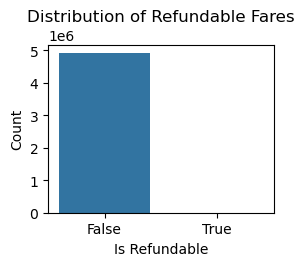

In [55]:
# Bar plot for isRefundable
plt.subplot(2, 2, 2)
sns.countplot(x="isRefundable", data=df_numeric)
plt.title("Distribution of Refundable Fares")
plt.xlabel("Is Refundable")
plt.ylabel("Count")
plt.show()

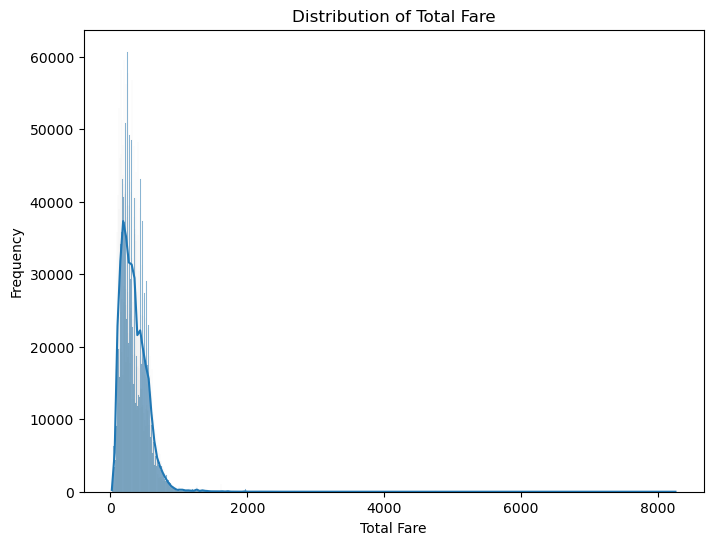

In [59]:
df_pandas = df_sample.select("totalFare").toPandas()

# Plot the histogram for totalFare
plt.figure(figsize=(8, 6))
sns.histplot(df_pandas["totalFare"], kde=True)
plt.title("Distribution of Total Fare")
plt.xlabel("Total Fare")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

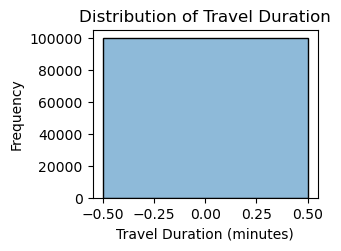

In [57]:
# Plot 4: Histogram of travelDuration
plt.subplot(2, 2, 4)
sns.histplot(df_pandas["travelDuration"], kde=True)
plt.title("Distribution of Travel Duration")
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Frequency")